In [6]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


import numpy as np
import gym

from scan_gym import envs
#imp.reload(envs)

#seed=42
#np.random.seed(seed)

import random
import os

In [10]:
def get_rewards_rnd(environment, models_path, model, n_images, n_episodes):
    scan_env = gym.make(environment, models_path=models_path, train_models=[model],
                   n_images = n_images, continuous=False, gt_mode=True, cube_view='static')
    
    rewards_per_step = [ [] for list in range(n_images-1)]
    
    for e in range(n_episodes):
        #generate random action set
        actions = np.random.randint(0, high=scan_env.nA, size=n_images-1)
        scan_env.reset()
        for i in range(len(actions)):
            state, reward, done, _ = scan_env.step(actions[i])
            rewards_per_step[i].append(reward)
        print("\r model{} episode:{}        ".format(model,e), end="")
    return rewards_per_step



def test_rnd_rewards(environment, models_path, models, n_images, n_episodes, dest_path ):
    for m in models:
        rwds = get_rewards_rnd(environment=environment, models_path=models_path,
                               model=m, n_images=n_images, n_episodes=n_episodes)
        
        create_histogram(rwds, os.path.join(dest_path,'h3_'+ m) )
        create_boxplot(rwds, os.path.join(dest_path,'b3_'+ m))
 

def create_histogram(rewards, dest_path):
    fig, axs = plt.subplots(5, 4, figsize=(20,13), sharex=True)
    fig.tight_layout(h_pad=4)
    for i in range(len(rewards)):
        axs[i//4,i%4].hist(rewards[i],bins=20)
        axs[i//4,i%4].set_title('step '+str(i+1))
        axs[i//4,i%4].set_ylim([0, 300])
        axs[i//4,i%4].set_xlim([0, 0.2])
    
    for ax in axs.flat:
        ax.set(xlabel='rwd', ylabel='frequency')
        
    fig.savefig(dest_path)
    plt.close(fig)
    
def create_boxplot(rewards, dest_path):
    fig, ax = plt.subplots(figsize=(20,10))
    ax.boxplot(rewards);
    ax.set(xlabel='step', ylabel='rwd')
    ax.grid()
    ax.set_ylim([0, 0.25])
    
    fig.savefig(dest_path)
    plt.close(fig)
        

In [11]:
environment = 'ScannerEnv-v1'
models_path  = '/home/pico/uni/romi/scanner-gym_models_v2_cube_128'
dest_path = '/home/pico/uni/romi/rewards_test_more_actions'
models = ['206_2d','207_2d','208_2d','209_2d', '210_2d',
               '211_2d','212_2d','213_2d' ,'214_2d' ,'215_2d',
               '216_2d','217_2d']

models = ['206_2d','207_2d']
n_images = 20
n_episodes = 1000

In [12]:
test_rnd_rewards(environment=environment, models_path=models_path,
                models=models, n_images=n_images, n_episodes=n_episodes, dest_path=dest_path )

 model207_2d episode:999        

In [4]:
rwds = get_rewards_rnd(environment=environment, models_path=models_path,
                       model='206_2d', n_images=n_images, n_episodes=n_episodes)

 model206_2d episode:999        

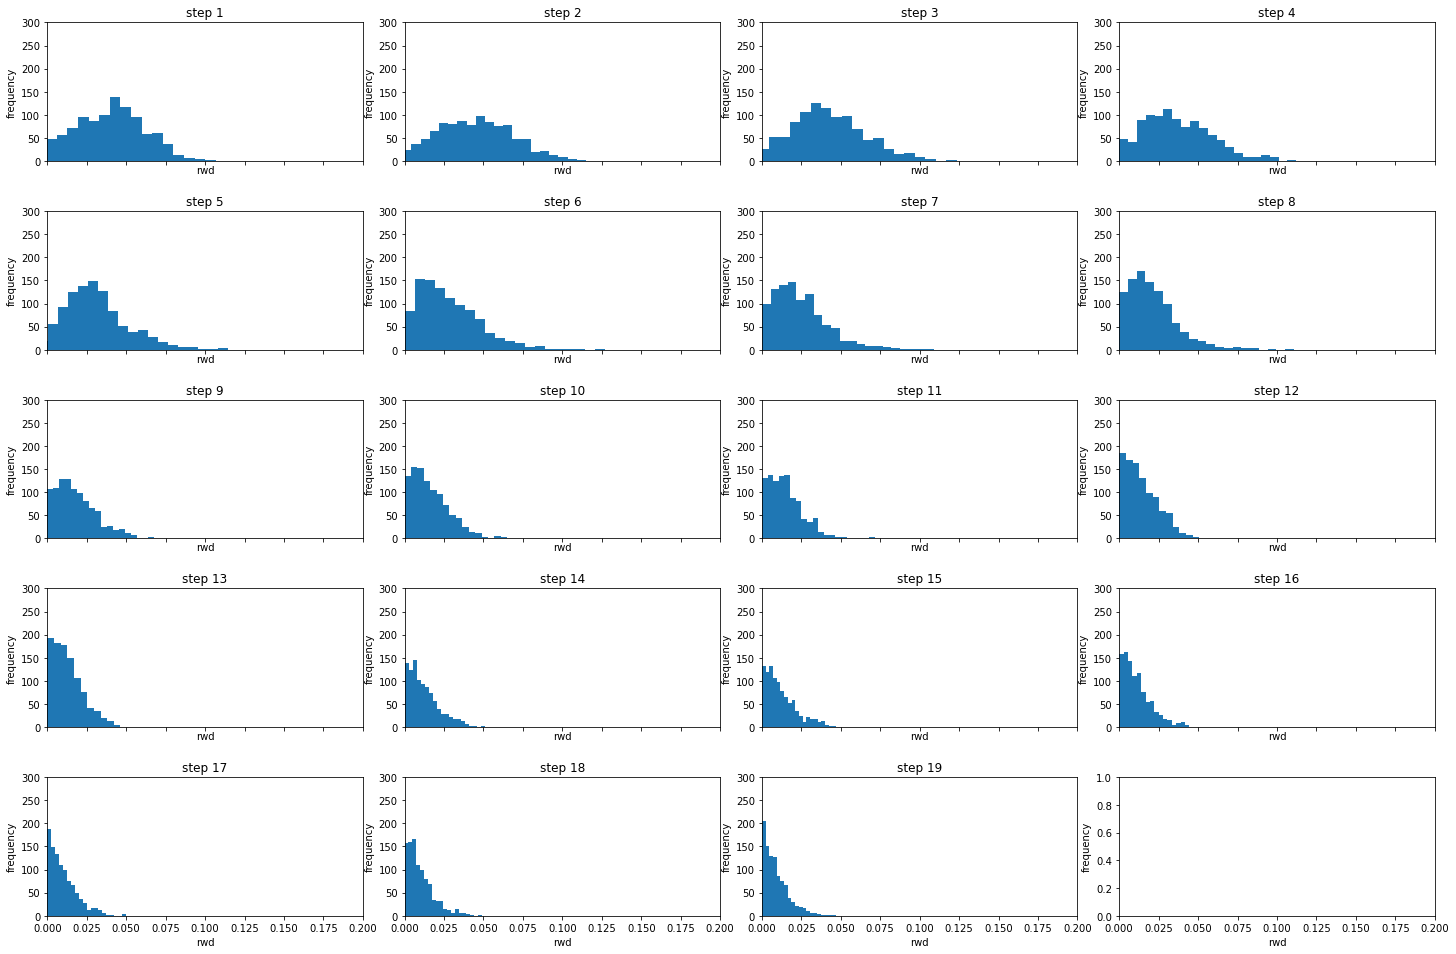

In [8]:
fig, axs = plt.subplots(5, 4, figsize=(20,13), sharex=True)
fig.tight_layout(h_pad=4)
for i in range(len(rwds)):
    axs[i//4,i%4].hist(rwds[i],bins=20)
    axs[i//4,i%4].set_title('step '+str(i+1))
    axs[i//4,i%4].set_ylim([0, 300])
    axs[i//4,i%4].set_xlim([0, 0.2])
    
for ax in axs.flat:
    ax.set(xlabel='rwd', ylabel='frequency')

(0.0, 0.25)

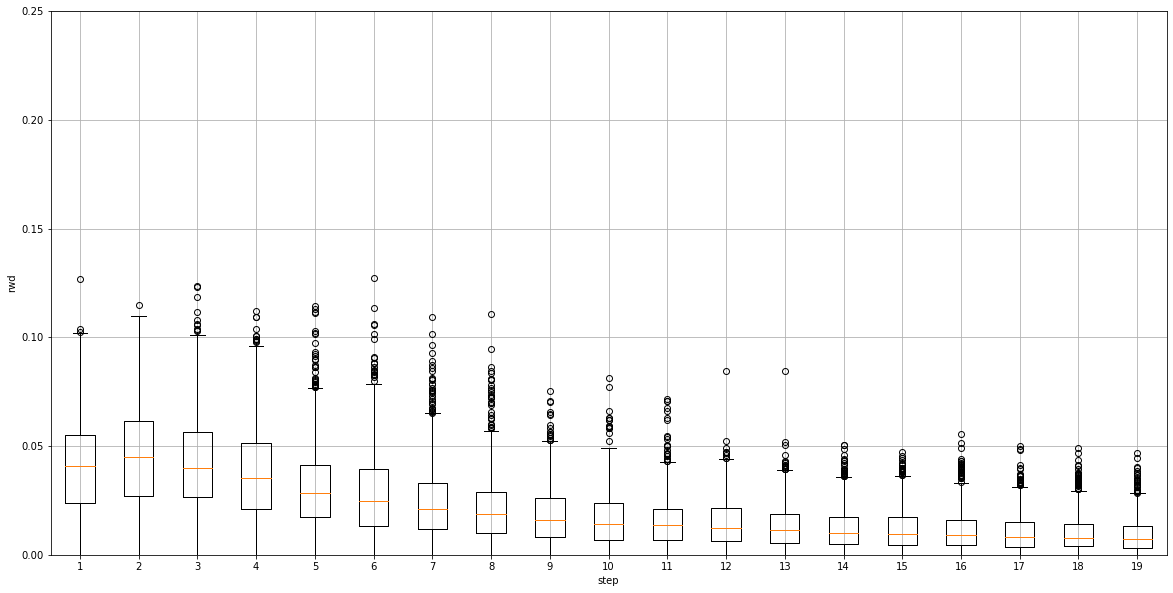

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(rwds);
ax.set(xlabel='step', ylabel='rwd')
ax.grid()
ax.set_ylim([0, 0.25])

In [7]:
scan_env = gym.make(environment, models_path=models_path, train_models=['216_2d'],
                   n_images = n_images, continuous=False, gt_mode=True, cube_view='static')

In [8]:
scan_env.nA

116

In [41]:
a

[[], [2]]

In [46]:
[3]*2

[3, 3]

In [47]:
[2,4] + [5,6]

[2, 4, 5, 6]

In [50]:
a = [1,2,3,4,5]

In [51]:
a[-3:]

[3, 4, 5]